In [14]:
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """There are a number of reasons you may need a block of text and when you do, a random paragraph can be the 
perfect solution. If you happen to be a web designer and you need some random text to show in your layout, a random paragraph 
can be an excellent way to do this. If you're a programmer and you need random text to test the program, 
using these paragraphs can be the perfect way to do this. Anyone who's in search of realistic text for a 
project can use one or more of these random paragraphs to fill their need.For writers looking for a way to get their 
creative writing juices flowing, using a random paragraph can be a great way to do this. One of the great benefits 
of this tool is that nobody knows what is going to appear in the paragraph. This can be leveraged in a few different 
ways to force the writer to use creativity. For example, the random paragraph can be used as the beginning paragraph 
of a story that the writer must finish. I can also be used as a paragraph somewhere inside a short story, or for a 
more difficult creative challenge, it can be used as the ending paragraph. In every case, the writer is forced to 
use creativity to incorporate the random paragraph into the story.For some writers, it isn't getting the original words 
on paper that's the challenge, but rewriting the first and second drafts. Using the random paragraph generator can be a 
good way to get into a rewriting routine before beginning the project. In this case, you take the random paragraph and 
rewrite it so it retains the same meaning, but does so in a better and more concise way. Beginning the day doing this 
with a random paragraph can make the rewriting of an article, short story, or chapter of a book much easier than trying 
to begin directly with it.When it comes to writers' block, often the most difficult part is simply beginning to put 
words to paper. One way that can often help is to write about something completely different from what you're having 
the writers' block about. This is where a random paragraph can be quite helpful. By using this tool you can begin to 
chip away at the writers' block by simply adding to the random paragraph that appears with the knowledge that it's 
going to be completely different from any writing you've been doing. Then once you begin to put words on the paper, 
it should be easier to transition into the writing that needs to get done.For those who are looking for a difficult 
writing challenge, the random paragraph generator can provide that as well. Instead of writing about the entire paragraph, 
take each sentence in the paragraph and make each of those individual sentences the first or last sentence of each paragraph 
of a short story. Trying this difficult writing challenge should stretch your creativity to the limit.The best way 
to use these random paragraphs is to generate a few and see how they can help with whatever project you're currently 
pursuing. You should be able to figure out quickly if this tool will be beneficial for your project or needs. 
Often times the best way to see if it's what you've been looking for is to use it and find out for yourself.
We're always seeking constructive ideas on how we can improve our random paragraph generator. If you have used 
this tool and have an idea on how we could improve it for the benefit of everyone, we'd love to hear from you. 
Take a moment to email us with your ideas so we can consider them for future updates."""

[nltk_data] Downloading package punkt to C:\Users\Pranavi's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
pip install gensim --user

  Using cached https://files.pythonhosted.org/packages/0b/66/04faeedb98bfa5f241d0399d0102456886179cabac0355475f23a2978847/gensim-3.8.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/1f/be/b14be5c3ad1ff73096b518be1538282f053ec34faaca60a8753d975d7e93/Cython-0.29.14-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [15]:
# Preprocessing the data 
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [16]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['there are a number of reasons you may need a block of text and when you do, a random paragraph can be the perfect solution.',
 'if you happen to be a web designer and you need some random text to show in your layout, a random paragraph can be an excellent way to do this.',
 "if you're a programmer and you need random text to test the program, using these paragraphs can be the perfect way to do this.",
 "anyone who's in search of realistic text for a project can use one or more of these random paragraphs to fill their need.for writers looking for a way to get their creative writing juices flowing, using a random paragraph can be a great way to do this.",
 'one of the great benefits of this tool is that nobody knows what is going to appear in the paragraph.',
 'this can be leveraged in a few different ways to force the writer to use creativity.',
 'for example, the random paragraph can be used as the beginning paragraph of a story that the writer must finish.',
 'i can also be used as 

In [18]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]
sent_word


[['there',
  'are',
  'a',
  'number',
  'of',
  'reasons',
  'you',
  'may',
  'need',
  'a',
  'block',
  'of',
  'text',
  'and',
  'when',
  'you',
  'do',
  ',',
  'a',
  'random',
  'paragraph',
  'can',
  'be',
  'the',
  'perfect',
  'solution',
  '.'],
 ['if',
  'you',
  'happen',
  'to',
  'be',
  'a',
  'web',
  'designer',
  'and',
  'you',
  'need',
  'some',
  'random',
  'text',
  'to',
  'show',
  'in',
  'your',
  'layout',
  ',',
  'a',
  'random',
  'paragraph',
  'can',
  'be',
  'an',
  'excellent',
  'way',
  'to',
  'do',
  'this',
  '.'],
 ['if',
  'you',
  "'re",
  'a',
  'programmer',
  'and',
  'you',
  'need',
  'random',
  'text',
  'to',
  'test',
  'the',
  'program',
  ',',
  'using',
  'these',
  'paragraphs',
  'can',
  'be',
  'the',
  'perfect',
  'way',
  'to',
  'do',
  'this',
  '.'],
 ['anyone',
  'who',
  "'s",
  'in',
  'search',
  'of',
  'realistic',
  'text',
  'for',
  'a',
  'project',
  'can',
  'use',
  'one',
  'or',
  'more',
  'of',
 

In [19]:
nltk.download('stopwords')
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to C:\Users\Pranavi's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [20]:
sent_word


[['number',
  'reasons',
  'may',
  'need',
  'block',
  'text',
  ',',
  'random',
  'paragraph',
  'perfect',
  'solution',
  '.'],
 ['happen',
  'web',
  'designer',
  'need',
  'random',
  'text',
  'show',
  'layout',
  ',',
  'random',
  'paragraph',
  'excellent',
  'way',
  '.'],
 ["'re",
  'programmer',
  'need',
  'random',
  'text',
  'test',
  'program',
  ',',
  'using',
  'paragraphs',
  'perfect',
  'way',
  '.'],
 ['anyone',
  "'s",
  'search',
  'realistic',
  'text',
  'project',
  'use',
  'one',
  'random',
  'paragraphs',
  'fill',
  'need.for',
  'writers',
  'looking',
  'way',
  'get',
  'creative',
  'writing',
  'juices',
  'flowing',
  ',',
  'using',
  'random',
  'paragraph',
  'great',
  'way',
  '.'],
 ['one',
  'great',
  'benefits',
  'tool',
  'nobody',
  'knows',
  'going',
  'appear',
  'paragraph',
  '.'],
 ['leveraged',
  'different',
  'ways',
  'force',
  'writer',
  'use',
  'creativity',
  '.'],
 ['example',
  ',',
  'random',
  'paragraph',
  

In [21]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [23]:
# Test the word vectors
vector = model.wv['designer']

print(vector)

[ 8.7304797e-04  9.8229160e-05  5.8600720e-04  2.7557642e-03
  3.5729222e-03  3.9408274e-04  1.7248631e-03 -6.0407125e-04
 -3.2532975e-04 -4.5596301e-03 -2.2691237e-03 -9.1196480e-04
 -5.1889085e-04 -3.6353157e-03 -3.8418819e-03 -4.8957658e-03
 -6.1864342e-04  3.4939805e-03  3.4848617e-03  2.3473650e-03
 -3.4651051e-03  8.5330789e-04 -1.3875698e-03  4.8256684e-03
  7.8596768e-04  4.4975001e-03 -3.4763010e-03 -2.6398108e-03
 -3.5251693e-03  4.4563666e-04 -5.3301110e-04  1.8087864e-03
  4.1767959e-03  2.3643647e-03 -2.9128701e-03 -4.4581946e-03
  8.4285974e-04  1.1838002e-03 -3.6934449e-04  2.6607865e-03
 -1.6104332e-03 -1.0962818e-03 -3.9668819e-03 -3.0163289e-03
 -4.5980015e-03 -3.2105001e-03  1.5697097e-03  3.9363932e-03
  1.1869173e-03 -6.8387249e-04  2.8730431e-04 -1.4688559e-03
  4.6403445e-03  4.2633824e-03  2.8138976e-03  4.8850407e-03
  2.8716654e-03 -3.2260132e-03 -3.7812088e-03  8.6687034e-04
  4.5614634e-03  2.5892251e-03 -1.6264472e-03  5.6364841e-04
 -7.8091811e-04  3.62982

In [25]:
# Most similar words
similar = model.wv.most_similar('programmer',topn=20)

similar

[('best', 0.26545339822769165),
 ('instead', 0.2256850302219391),
 ('us', 0.20806612074375153),
 ('random', 0.19273892045021057),
 ('provide', 0.162068173289299),
 ('benefit', 0.1618664562702179),
 ('begin', 0.1520739644765854),
 ('currently', 0.14502441883087158),
 ('perfect', 0.14054326713085175),
 ('comes', 0.13654853403568268),
 ('benefits', 0.13342590630054474),
 ('example', 0.131686270236969),
 ('something', 0.130612313747406),
 ('sentences', 0.1270434558391571),
 ('needs', 0.12643182277679443),
 ('routine', 0.12532231211662292),
 ('story', 0.12008142471313477),
 ('hear', 0.12001796066761017),
 ('writing', 0.11752286553382874),
 ('knows', 0.11612990498542786)]

In [26]:
# You can also check words similarity and compare above
model.wv.similarity(w1='creative',w2='writing')

0.018797928

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


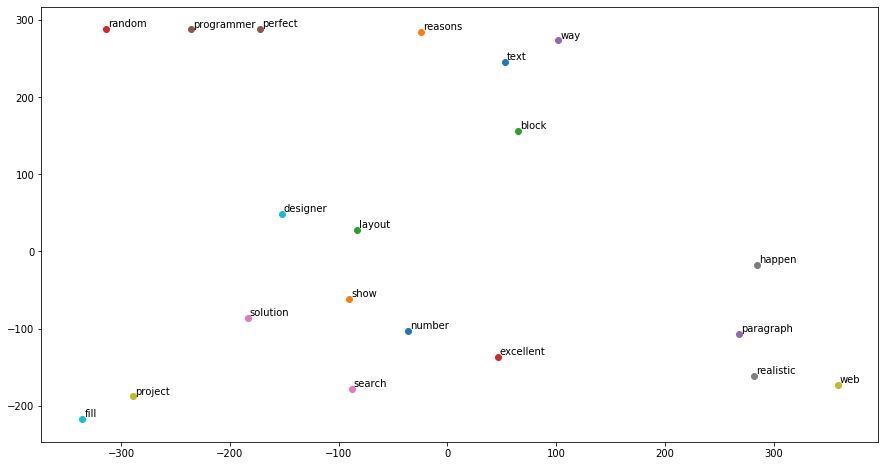

In [27]:
from sklearn.manifold import  TSNE
vocab = ['number','reasons','block','random','paragraph','perfect','solution','happen','web','designer','text','show','layout',
         'excellent','way','programmer','search','realistic','project','fill']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)